In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Loading the Dataset

data = pd.read_csv('index.csv')
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [3]:
# Display the first few rows of the dataset
print(data.head())


# Display the last few rows of the dataset
data.tail()

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


,date,datetime,cash_type,card,money,coffee_name
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte
1132,2024-07-31,2024-07-31 21:55:16.570,card,ANON-0000-0000-0446,32.82,Latte


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
data.shape

(1133, 6)

In [16]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Convert 'datetime' column to a proper datetime format
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

# Handling missing values in the 'card' column by filling with placeholder or dropping (optional)
# Option 1: Fill missing card values with a placeholder (e.g., 'Unknown')
# data['card'].fillna('Unknown', inplace=True)

# Option 2: Drop rows with missing 'card' values (if preferred)
data.dropna(subset=['card'], inplace=True)

# Confirming the changes
print(data.info())


Missing values in each column:
date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   object        
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 53.2+ KB
None


# Exploratory Data Analysis (EDA)

In [18]:
# Extract date and time information for further analysis
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Convert 'date' column to datetime

# Group by date to get total sales per day
daily_sales = data.groupby('date')['money'].sum().reset_index()

# Display the daily sales
print(daily_sales.head())


        date  money
0 2024-03-01  396.3
1 2024-03-02  228.1
2 2024-03-03  349.1
3 2024-03-04  135.2
4 2024-03-05  338.5


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


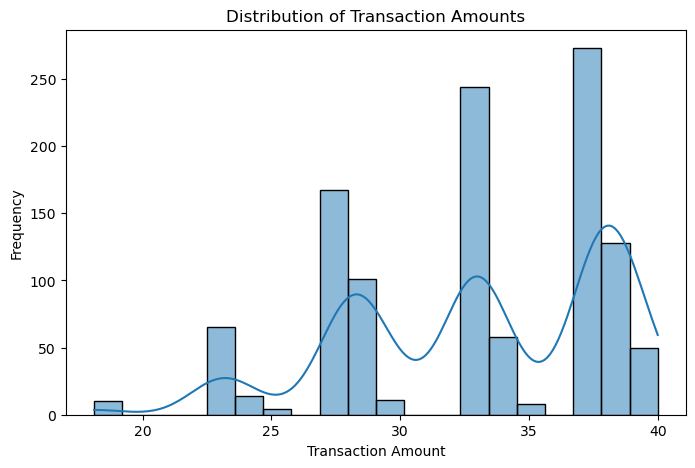

In [20]:
# Display distribution of the sales (money column)
# Plot distribution of sales
plt.figure(figsize=(8, 5))
sns.histplot(data['money'], bins=20, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

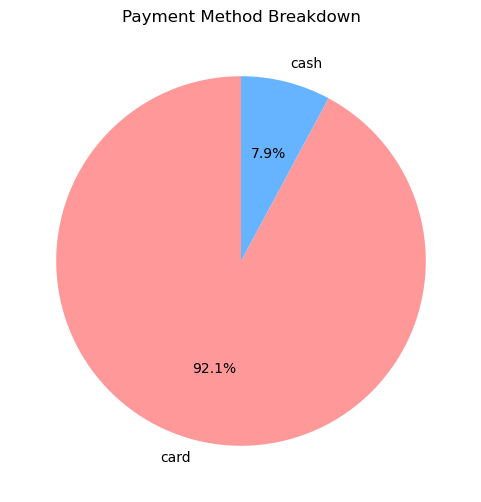

In [21]:
# Payment method breakdown
payment_method_counts = data['cash_type'].value_counts()

# Plot the breakdown of payment methods
plt.figure(figsize=(6, 6))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Payment Method Breakdown')
plt.ylabel('')
plt.show()


In [22]:
# Checking again for missing values after initial handling
missing_values = data.isnull().sum()
print("Missing values after handling:")
print(missing_values)


Missing values after handling:
date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64


# Visualization and Reporting

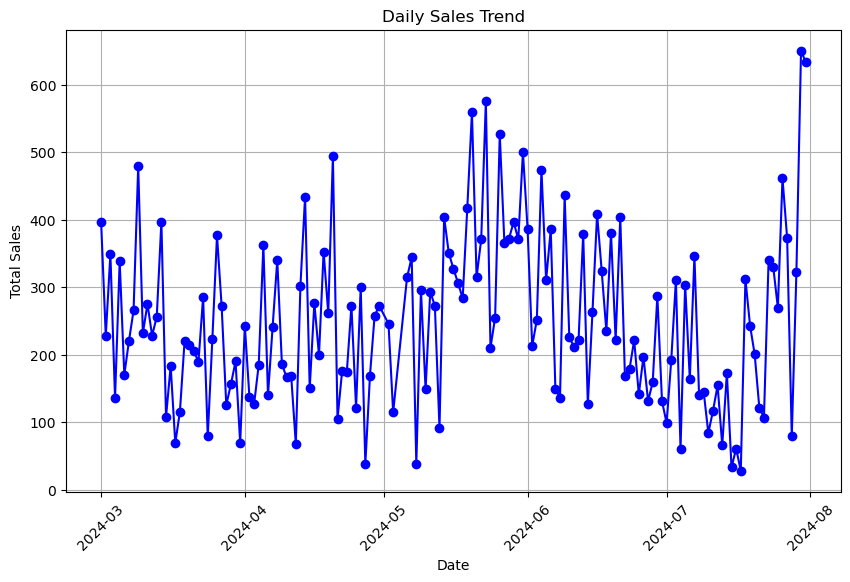

In [23]:
# Plot daily sales trend
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['date'], daily_sales['money'], marker='o', color='b')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Popular Coffee Types: Analyze and visualize which coffee types are most popular.

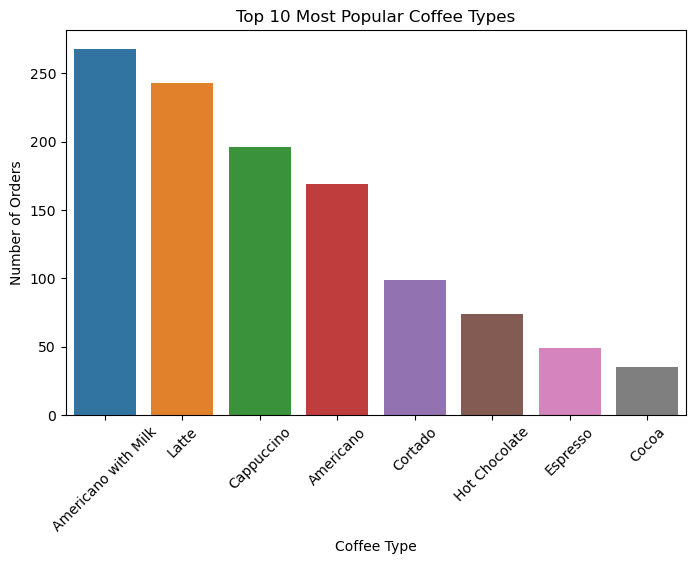

In [24]:
# Coffee type analysis
coffee_counts = data['coffee_name'].value_counts()

# Plot top 10 popular coffee types
plt.figure(figsize=(8, 5))
sns.barplot(x=coffee_counts.index[:10], y=coffee_counts.values[:10])
plt.title('Top 10 Most Popular Coffee Types')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


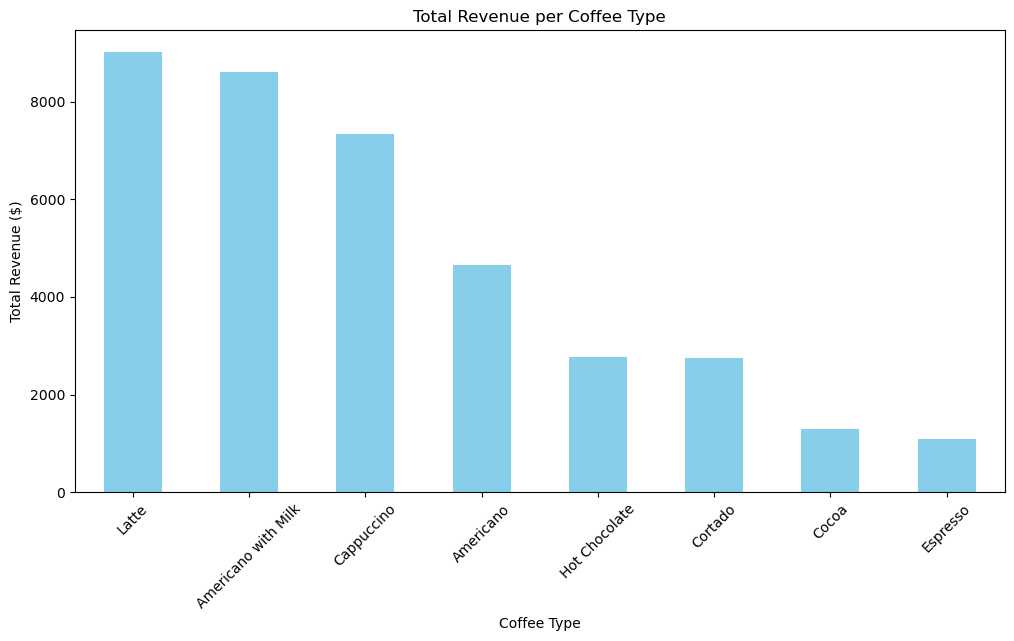

In [31]:
# Calculate total revenue per coffee type
revenue_per_coffee = data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

# Visualize the total revenue per coffee type
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
revenue_per_coffee.plot(kind='bar', color='skyblue')
plt.title('Total Revenue per Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()


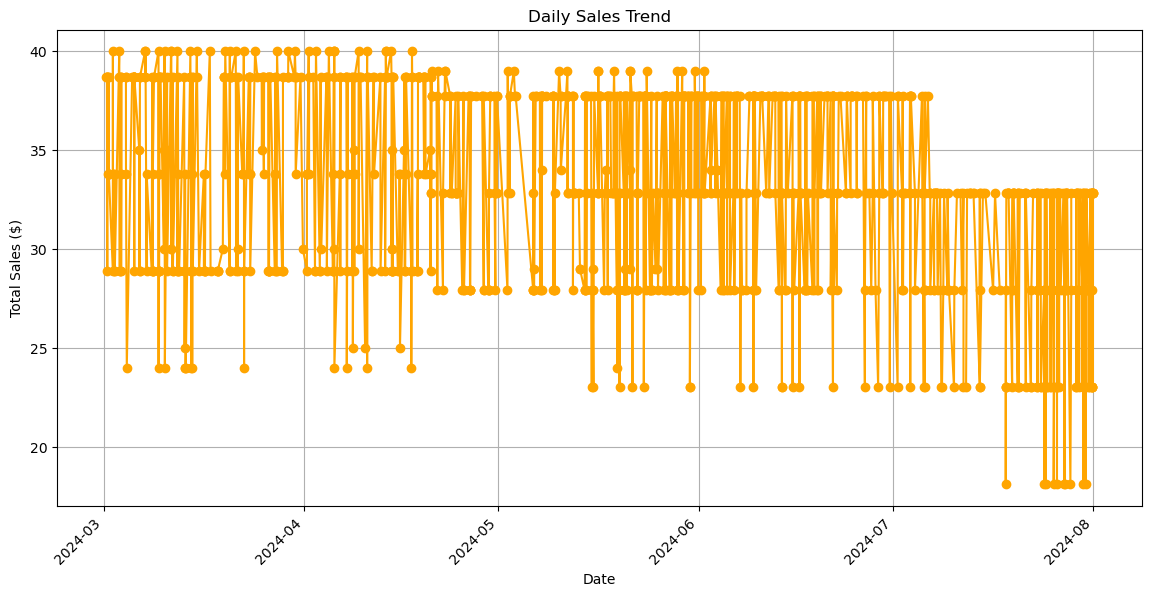

In [34]:
# Convert 'date' column to datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Calculate daily total sales
daily_sales = data.groupby('datetime')['money'].sum()

# Visualize daily sales trend
plt.figure(figsize=(14, 7))
daily_sales.plot(kind='line', marker='o', color='orange')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


,datetime,cash_type,card,money,coffee_name
date,,,,,
2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...
2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
